# Menu Table

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_feather("../Cleaned Data Files/Menu-cleaned.feather")

## Description

Each entry is an individual menu with information on where it was used and who created it (i.e., a hotel or a restaurant)

* There were previously 17545 records across 20 columns
* There are now 15984 records across 15 columns

In [21]:
df.shape

(15396, 15)

In [22]:
df.dtypes

id                       int64
name                    object
sponsor                 object
event                   object
venue                   object
place                   object
physical_description    object
occasion                object
notes                   object
call_number             object
date                    object
location                object
status                  object
page_count               int64
dish_count               int64
dtype: object

In [23]:
df.head(5)

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,date,location,status,page_count,dish_count
0,12463,None,HOTEL EASTMAN,BREAKFAST,COMMERCIAL,"HOT SPRINGS, AR",CARD; 4.75X7.5;,EASTER;,None,1900-2822,1900-04-15,Hotel Eastman,complete,2,67
1,12464,None,REPUBLICAN HOUSE,[DINNER],COMMERCIAL,"MILWAUKEE, [WI];",CARD; ILLUS; COL; 7.0X9.0;,EASTER;,WEDGEWOOD BLUE CARD; WHITE EMBOSSED GREEK KEY ...,1900-2825,1900-04-15,Republican House,under review,2,34
2,12465,None,NORDDEUTSCHER LLOYD BREMEN,FRUHSTUCK/BREAKFAST;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,None,"MENU IN GERMAN AND ENGLISH; ILLUS, STEAMSHIP A...",1900-2827,1900-04-16,Norddeutscher Lloyd Bremen,complete,2,84
3,12466,None,NORDDEUTSCHER LLOYD BREMEN,LUNCH;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,None,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2828,1900-04-16,Norddeutscher Lloyd Bremen,complete,2,63
4,12467,None,NORDDEUTSCHER LLOYD BREMEN,DINNER;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,FOLDER; ILLU; COL; 5.5X7.5;,None,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2829,1900-04-16,Norddeutscher Lloyd Bremen,complete,4,33


In [24]:
df.describe(include="all")

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,date,location,status,page_count,dish_count
count,15396.000000,3194,15396,7911,7621,7644,14186,3775,10067,15395,15396,15396,15396,15396.000000,15396.000000
unique,NaN,792,5554,1737,229,3327,5745,416,6597,15348,6557,5713,2,NaN,NaN
top,NaN,Waldorf Astoria,Waldorf Astoria,DINNER,COMMERCIAL,EN ROUTE,BROADSHEET; ILLUS; 6.5 X 7.75;,DAILY;,B&W PHOTOGRAPHS OF VARIOUS POINTS OF INTEREST ...,1899-806,1915-01-01,Waldorf Astoria,complete,NaN,NaN
freq,NaN,475,695,1826,4700,292,127,828,112,3,263,703,15236,NaN,NaN
mean,26159.870291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.493310,76.351715
std,6153.002166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.342584,100.224728
min,12463.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,21958.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,20.000000
50%,27204.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,34.000000
75%,31271.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,95.000000


## Remediated - Missing Values - Section 2.1

* `keywords`, `language`, and `location_type` were at 100% missing previously. Now they're not present
* Other columns such as `name`, `currency` and others, are still missing some information. **But previouly, the important to us column *sponsor* was missing 8% while now it's 0%**

In [25]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.name = 'Percentage of Missing Values'
missing_percentage

id                       0.000000
name                    79.254352
sponsor                  0.000000
event                   48.616524
venue                   50.500130
place                   50.350740
physical_description     7.859184
occasion                75.480644
notes                   34.612886
call_number              0.006495
date                     0.000000
location                 0.000000
status                   0.000000
page_count               0.000000
dish_count               0.000000
Name: Percentage of Missing Values, dtype: float64

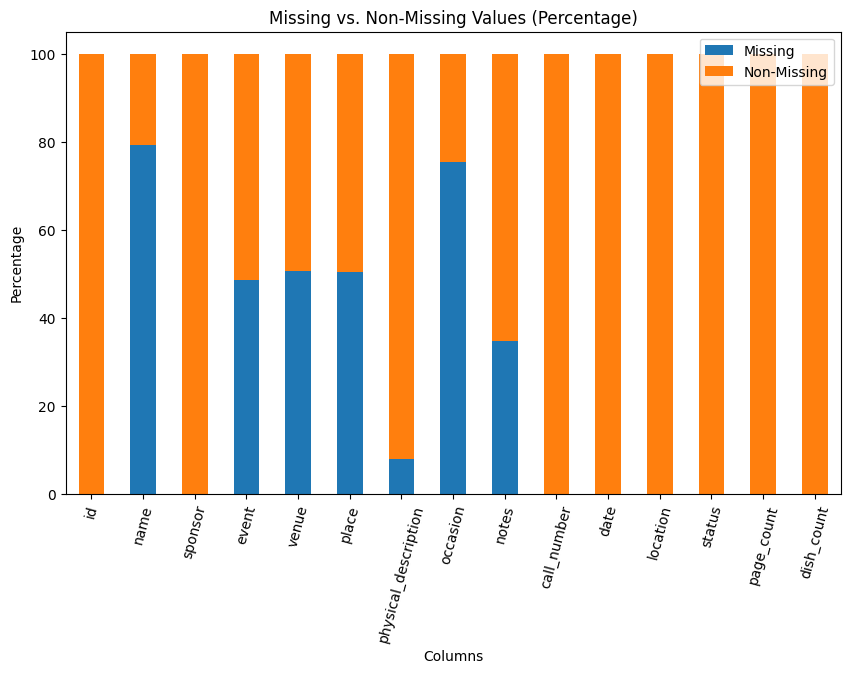

In [26]:
non_missing_percentage = 100 - missing_percentage
missing_data_percentage = pd.DataFrame({'Missing': missing_percentage, 'Non-Missing': non_missing_percentage})
missing_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Missing vs. Non-Missing Values (Percentage)')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=75)
plt.show()

## Inconsistency Error - Section 2.2

* `date` used to have some values outside the range of our dataset, but not anymore. Refer to the previous Jupyter Notebook for old values.

In [27]:
df.loc[df['date'] < '1800-01-01']

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,date,location,status,page_count,dish_count


In [28]:
# Based on when was the dataset uploaded to the box by our professor. April 22, 2021. 
# We gave a generous buffer zone in case the professor downloaded the dataset days before.
df.loc[df['date'] > '2021-01-01']

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,date,location,status,page_count,dish_count
